In [59]:
from Bio import SeqIO
import subprocess, shlex
import sys
sys.path.append('./src/')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import smallpars
import glob

In [13]:
folders = ['./examples/ORCO_Chemoreceptors/round2/' , './examples/sas6/round2/' , './examples/RRNPP/round2/all/' ]
folders += glob.glob('./examples/fsx1/*/')
print(folders)

NameError: name 'glob' is not defined

In [1]:
import pandas as pd
from ete3 import ncbi_taxonomy
import toytree
import colour
import sys
#create a legend for the colors using matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#make a list of the patches
import toyplot.svg

sys.path.append('./src/')
#drwa tree with a large figure size
for folder in folders:
    print(folder)

    seqdf = pd.read_csv(folder +'sequence_dataset.csv')
    print(seqdf.columns)
    print(seqdf['Taxonomic lineage (Ids)'])
    seqdf['linIDs'] = seqdf['Taxonomic lineage (Ids)'].map(lambda x : set( x.split(',') ) )
    print(seqdf.linIDs)
    seqdf['phylum'] = seqdf.linIDs.map(lambda x : [s.split()[0] for s in x if '(phylum)' in s]  )
    print(seqdf.phylum)
    seqdf['order'] = seqdf.linIDs.map(lambda x : [s.split()[0] for s in x if '(class)' in s]  )
    print(seqdf.order)

    ncbi = ncbi_taxonomy.NCBITaxa()

    translator = ncbi.get_taxid_translator([ o[0] for o in seqdf.order if len(o) > 0 ])
    seqdf['order_name'] = seqdf.order.map(lambda x : translator[int(x[0])] if len(x)> 0 else 'NA' )
    print(seqdf.order_name)
    print(translator)
    tre = toytree.tree(folder +'core_0_tree.nwk.PP.nwk.rooted')
    orderlabel = dict(zip(seqdf['Entry'],seqdf.Organism))
    tiplabels = [ l +' '+ orderlabel.get(l,l) for l in tre.get_tip_labels() ]
    #create a unique hex color for each order
    order_colors = colour.Color("red").range_to(colour.Color("blue"),len(set(seqdf['order_name'])))
    order_colors = { o : c.hex for o,c in zip(set(seqdf['order_name']),order_colors) }
    print(order_colors)
    #assign colors to each sequence in seqdf based on order
    seqdf['order_color'] = seqdf['order_name'].map(lambda x : order_colors[x] if x != 'NA' else '#000000' )
    print(seqdf['order_color'])
    cmapper = { l : c for l,c in zip(seqdf['Entry'],seqdf['order_color']) }
    colorvec = [ cmapper.get(l,'#000000') for l in tre.get_tip_labels() ]
    print(len(seqdf.Entry.unique()))
    print(len(tre.get_tip_labels()))
    print(len(colorvec))
    canvas, axes, mark = tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000 )
    tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000 )
    toyplot.svg.render(canvas, folder  +"order_tree-plot.svg")
    patches = [ mpatches.Patch(color=c, label=l) for l,c in order_colors.items() ]
    #make a legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.savefig(folder+'tree_legend.svg', bbox_inches='tight')
    plt.show()


NameError: name 'folders' is not defined

Index(['uniprot_id', 'dataset', 'genomic_accession', 'species', 'strain',
       'genomic_context', 'intergenic_distance', 'receptor_id',
       'grp_identical_proteins', 'rep_sequence', 'receptor_family', 'r_start',
       'r_end', 'r_strand', 'TPR_hmm_name', 'TPR_hmm_accession',
       'TPR_hmm_coverage', 'TPR_hmm_evalue', 'HTH_hmm_name',
       'HTH_hmm_accession', 'HTH_hmm_coverage', 'HTH_hmm_evalue',
       'homologous_ref_receptor', 'blastp_evalue', 'perc_identity',
       'perc_cover', 'propeptide_id', 'p_start', 'p_end', 'p_strand',
       'p_RBS_bin', 'p_RBS_motif', 'p_RBS_spacer', 'Prediction',
       'propeptide_score', 'SP(Sec/SPI)', 'TAT(Tat/SPI)', 'LIPO(Sec/SPII)',
       'OTHER', 'CS_Position', 'qss_id', 'genetic_element',
       'Phaster_prophage_prediction', 'prophage_region', 'taxid', 'lineage',
       'class', 'order', 'family', 'genus'],
      dtype='object')
receptor_family
{'subfam_21': '#f00', 'subfam_22_QssR': '#ff2100', 'subfam_25': '#ff4200', 'subfam_02_Rgg': 

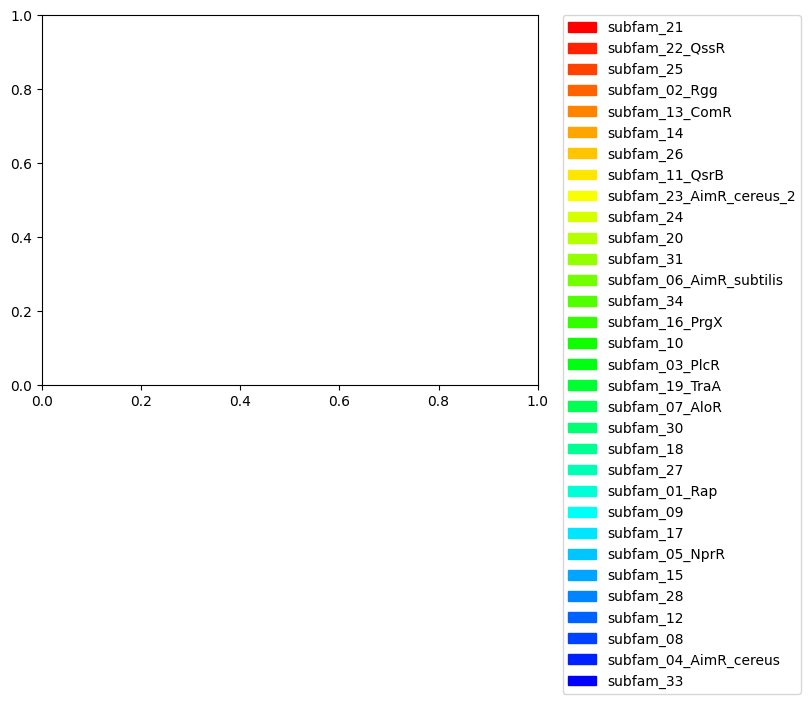

homologous_ref_receptor
{'AimR-like_[B._phage_Waukesha]': '#f00', 'PrgX_[E._faecalis_plasmid]': '#f50', 'QssR5_[C._saccharoperbutylacetonicum]': '#fa0', 'Rgg2_[S._pyogenes]': '#ff0', 'RopB_[S._pyogenes]': '#af0', 'TraA_[E._faecalis_plasmid]': '#5f0', 'PlcR_[B._cereus]': '#0f0', 'AimR_[B._phage_phi3T]': '#0f5', 'QsrB_[C._acetobutylicum]': '#0fa', 'NprR_[B._thuringensis]': '#0ff', 'AloR13_[P._polymyxa]': '#0af', nan: '#05f', 'RapA_[B._subtilis]': '#00f'}
0      #05f
1      #00f
2      #00f
3      #00f
4      #00f
       ... 
857    #05f
858    #05f
859    #05f
860    #05f
861    #05f
Name: order_color, Length: 862, dtype: object
770
770


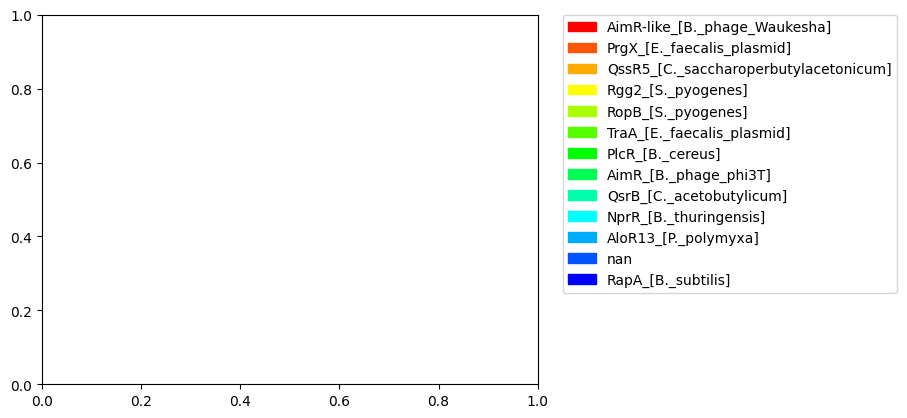

p_RBS_motif
{'AGAAGG': '#f00', 'AGGA': '#ff4e00', 'GGCGG': '#ff9d00', 'GGAG': '#ffeb00', 'AGTAGG': '#c4ff00', 'GGTGG': '#76ff00', 'GAGG': '#27ff00', 'GGAGG': '#00ff27', 'GGGGG': '#00ff76', 'AGGAG': '#00ffc4', 'AGGAGG': '#00ebff', 'AGGGGG': '#009dff', 'AGGTGG': '#004eff', nan: '#00f'}
0      #00ffc4
1      #00ffc4
2      #ffeb00
3      #00ffc4
4      #00ffc4
        ...   
857       #00f
858       #00f
859       #00f
860    #00ff76
861       #00f
Name: order_color, Length: 862, dtype: object
770
770


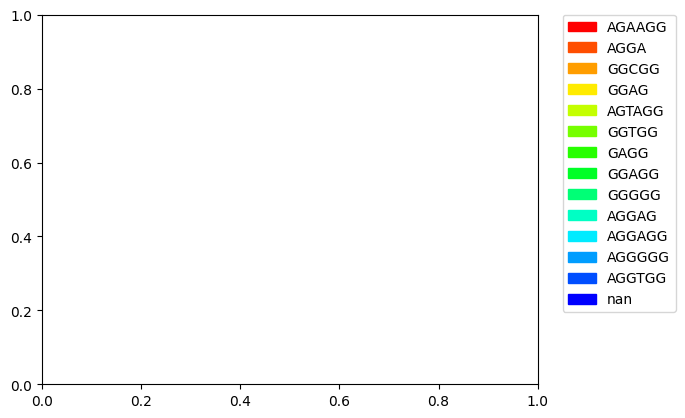

dataset
{'Viruses': '#f00', 'Firmicutes': '#00f'}
0      #00f
1      #00f
2      #00f
3      #00f
4      #00f
       ... 
857    #00f
858    #00f
859    #00f
860    #00f
861    #00f
Name: order_color, Length: 862, dtype: object
770
770


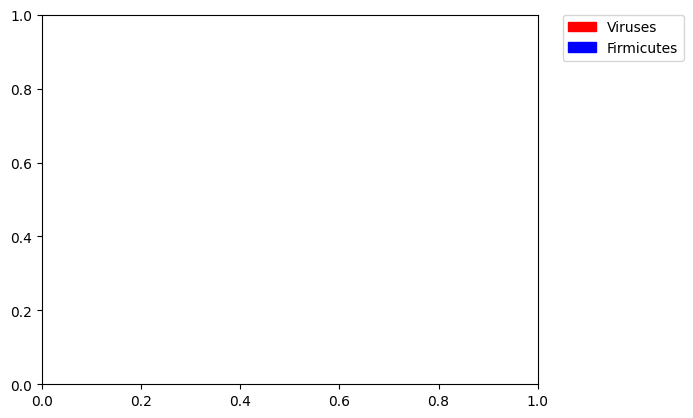

In [15]:
folder = 'examples/RRNPP/round2/all/'
labels = pd.read_table('./examples/RRNPP/round2/metadata.tsv')
print(labels.columns)
labels_select = ['receptor_family'  , 'homologous_ref_receptor' , 'p_RBS_motif' ,'dataset'   ]

for l in labels_select:
        
    print(l)


    tre = toytree.tree(folder +'core_tree.nwk.PP.nwk.rooted')
    orderlabel = dict(zip(labels['uniprot_id'],labels[l]))
    tiplabels = [ str(l) +' '+ str(orderlabel.get(l,l) ) for l in tre.get_tip_labels() ]
    #create a unique hex color for each order


    order_colors = colour.Color("red").range_to(colour.Color("blue"),len(set(labels[l])))
    order_colors = { o : c.hex for o,c in zip(set(labels[l]),order_colors) }
    print(order_colors)
    #assign colors to each sequence in seqdf based on order
    labels['order_color'] = labels[l].map(lambda x : order_colors[x] if x != 'NA' else '#000000' )
    print(labels['order_color'])

    cmapper = { l : c for l,c in zip(labels['uniprot_id'],labels['order_color']) }
    colorvec = [ cmapper.get(l,'#000000') for l in tre.get_tip_labels() ]

    print(len(tre.get_tip_labels()))
    print(len(colorvec))

    canvas, axes, mark = tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000)
    patches = [ mpatches.Patch(color=c, label=l) for l,c in order_colors.items() ]
    toyplot.svg.render(canvas, folder  + l +"_tree-plot.svg")
    #make a legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.savefig(folder+ l +'_tree_legend.svg', bbox_inches='tight')
    plt.show()

In [2]:
#grab identifiers
import ete3
import numpy as np

In [3]:



tree1 = ete3.Tree('./examples/RRNPP/round2/all/struct_0_tree.nwk.PP.nwk.rooted', format=1)
#use ete3 to calculat distance matrix between leaves
m1 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree1.get_leaves()):
    for j, leaf2 in enumerate(tree1.get_leaves()):
        if i == j:
            m1[i,j] = 0
        else:
            m1[i,j] = tree1.get_distance(leaf1, leaf2)



In [3]:
order = { l : i for i,l in enumerate(tree1.get_leaf_names()) }

In [4]:

tree3 = ete3.Tree('./examples/RRNPP/round2/all/struct_2_tree.nwk.PP.nwk.rooted', format=1)
#use ete3 to calculat distance matrix between leaves
m3 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree3.get_leaves()):
    for j, leaf2 in enumerate(tree3.get_leaves()):
        if i == j:
            m3[order[leaf1.name],order[leaf2.name]] = 0
        else:
            m3[order[leaf1.name],order[leaf2.name]] = tree3.get_distance(leaf1, leaf2)

In [5]:
tree2 = ete3.Tree('./examples/RRNPP/round2/all/sequences.aln.fst.nwk', format=1)
#use ete3 to calculat distance matrix between leaves
m2 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree2.get_leaves()):
    for j, leaf2 in enumerate(tree2.get_leaves()):
        if leaf1.name in order and leaf2.name in order:
            if i == j:
                m2[order[leaf1.name],order[leaf2.name]] = 0
            else:
                m2[order[leaf1.name],order[leaf2.name]] = tree2.get_distance(leaf1, leaf2)


In [6]:
np.save( './examples/RRNPP/round2/all/struct_0.dist.npy', m1)
np.save( './examples/RRNPP/round2/all/struct_2.dist.npy', m3)
np.save( './examples/RRNPP/round2/all/struct_1.dist.npy', m2)

In [16]:
aln = './examples/RRNPP/round2/all/sequences.aln.fst'

alndist = np.zeros((   len(tree1.get_leaves()), len(tree1.get_leaves()) ))
import Bio.SeqIO

for i, seq1 in enumerate(Bio.SeqIO.parse(aln, 'fasta')):
    for j, seq2 in enumerate(Bio.SeqIO.parse(aln, 'fasta')):
        if i == j:
            alndist[order[seq1.id],order[seq2.id]] = 0
        elif i < j:
            alndist[order[seq1.id],order[seq2.id]] = sum([ 1 if seq1.seq[k] == seq2.seq[k] and seq2.seq[k] != '-' and seq1.seq[k] != '-' else 0 for k in range(len(seq1.seq)) ])
            / max(len(seq1.seq.replace('-','')),len(seq2.seq.replace('-','')))
alndist += alndist.T


In [20]:
np.save( './examples/RRNPP/round2/all/alndist.dist.npy', alndist)


In [16]:
alndist = np.load( './examples/RRNPP/round2/all/alndist.dist.npy')
m1 = np.load( './examples/RRNPP/round2/all/struct_0.dist.npy')
m2 = np.load( './examples/RRNPP/round2/all/struct_1.dist.npy')
m3 = np.load( './examples/RRNPP/round2/all/struct_2.dist.npy')

In [17]:

import copy 
minmat = copy.deepcopy(m2)
minmat[ np.where( m1 < m2 ) ] = m1[ np.where( m1 < m2 ) ]


In [18]:
print(alndist.shape)

(770, 770)


In [20]:
#make a dictionary of the distance matrices
distdict = { 'mode 0' : m1, 'sequences' : m2, 'aln identity' : alndist ,   'mode 2' :m3 , 'min' : minmat }

In [23]:
distdict['mode 2 exp'] = np.exp( 3 * m3 )
distdict['mode 0 exp'] = np.exp( 3 * m1 )


mode 0 , sequences


<Figure size 1000x1000 with 0 Axes>

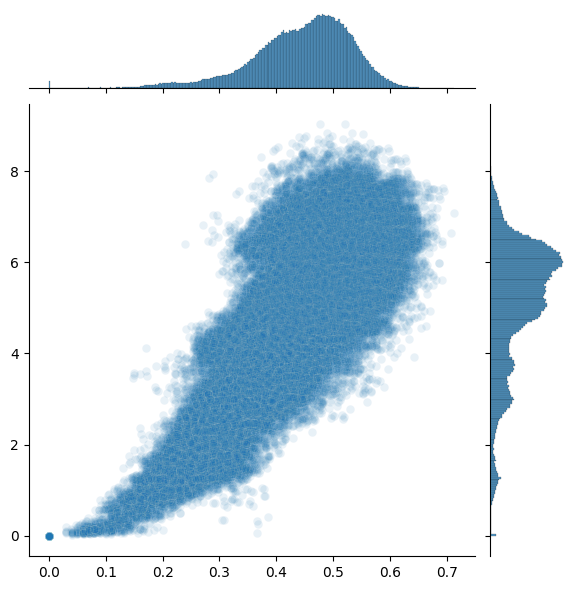

mode 0 , aln identity


<Figure size 1000x1000 with 0 Axes>

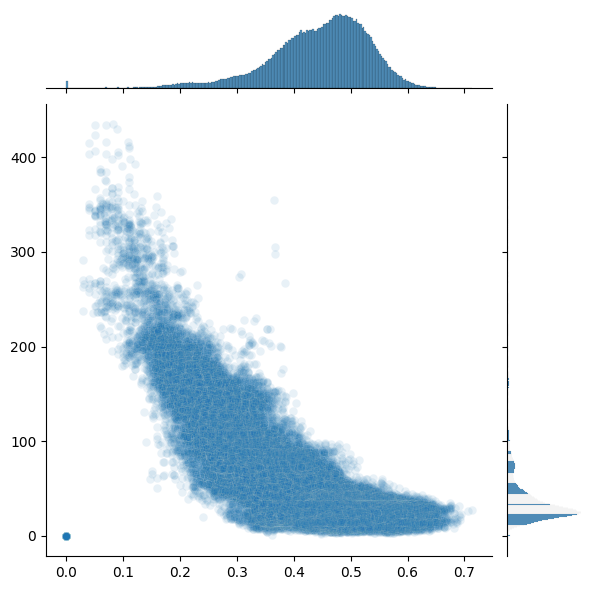

mode 0 , mode 2


<Figure size 1000x1000 with 0 Axes>

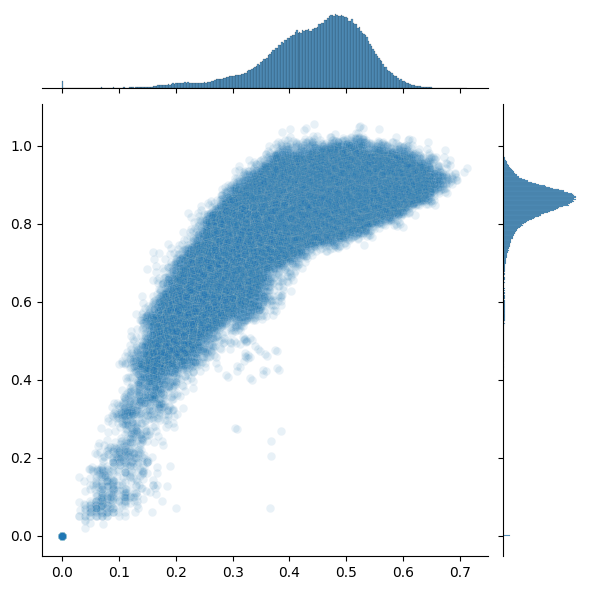

mode 0 , min


<Figure size 1000x1000 with 0 Axes>

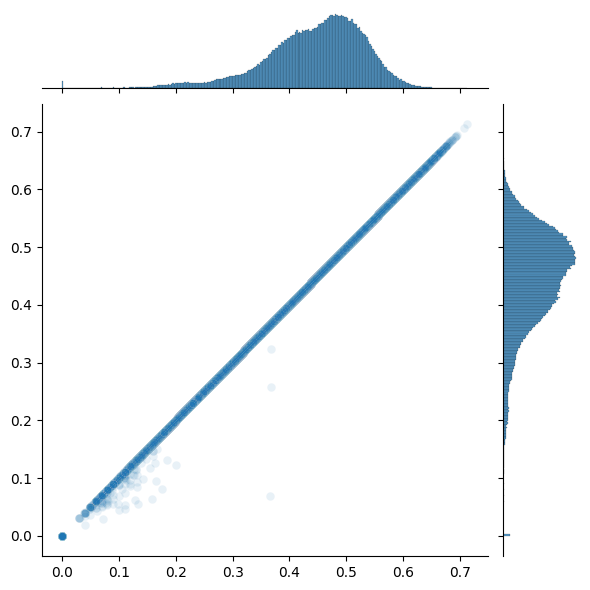

mode 0 , mode 2 exp


<Figure size 1000x1000 with 0 Axes>

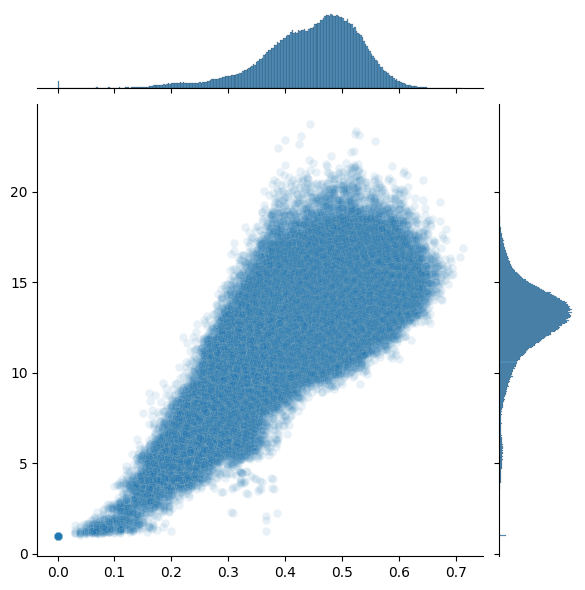

mode 0 , mode 0 exp


<Figure size 1000x1000 with 0 Axes>

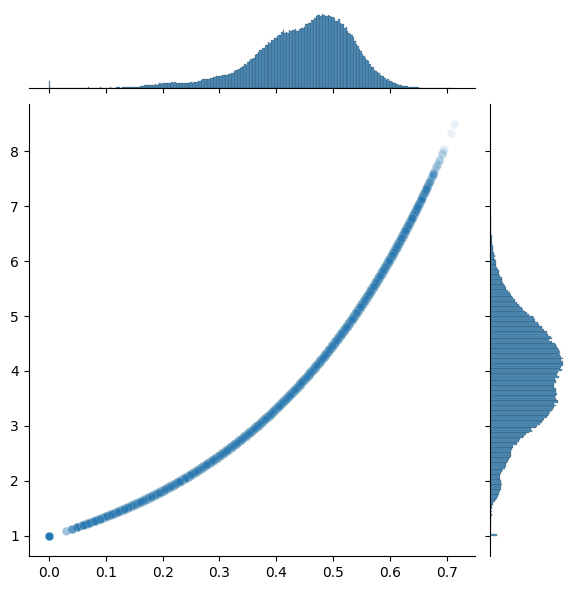

sequences , aln identity


<Figure size 1000x1000 with 0 Axes>

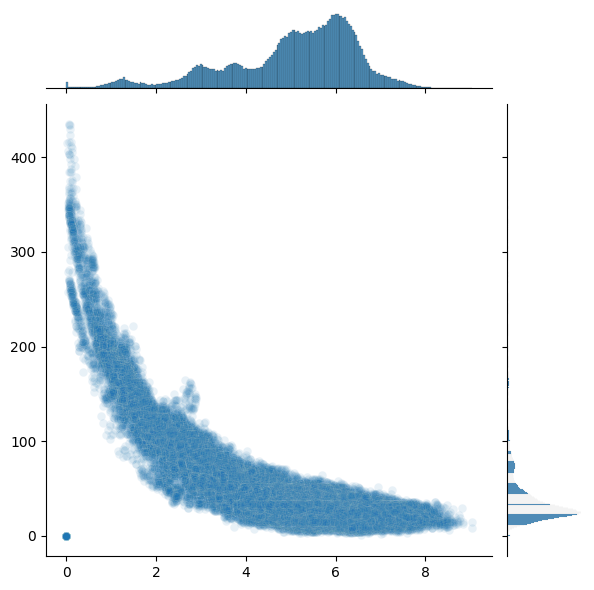

sequences , mode 2


<Figure size 1000x1000 with 0 Axes>

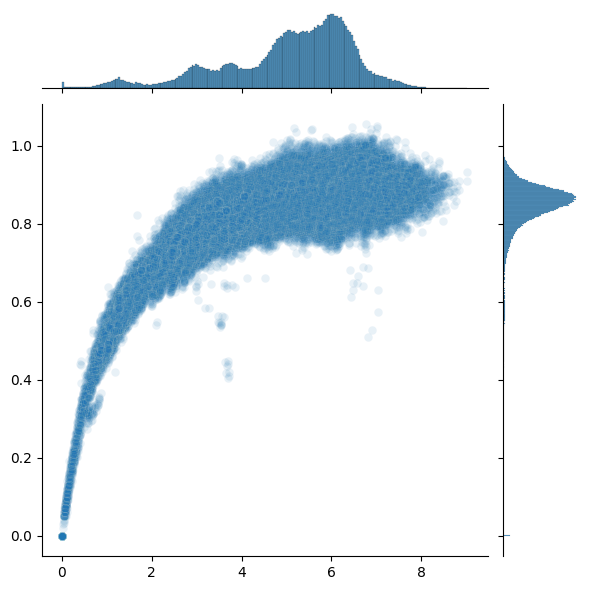

sequences , min


<Figure size 1000x1000 with 0 Axes>

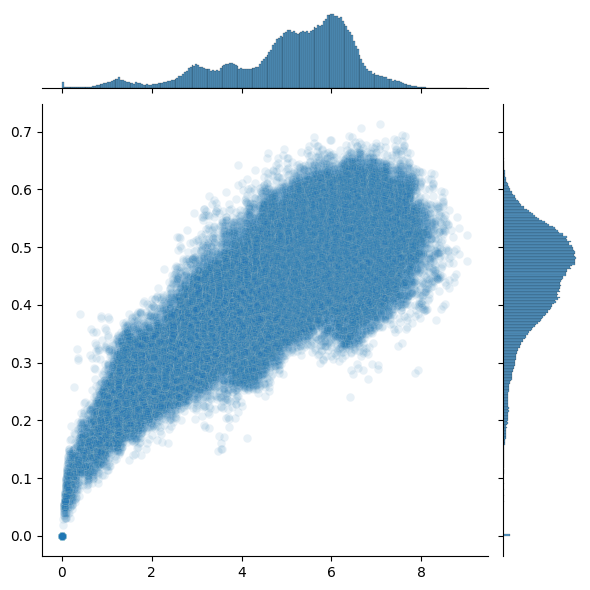

sequences , mode 2 exp


<Figure size 1000x1000 with 0 Axes>

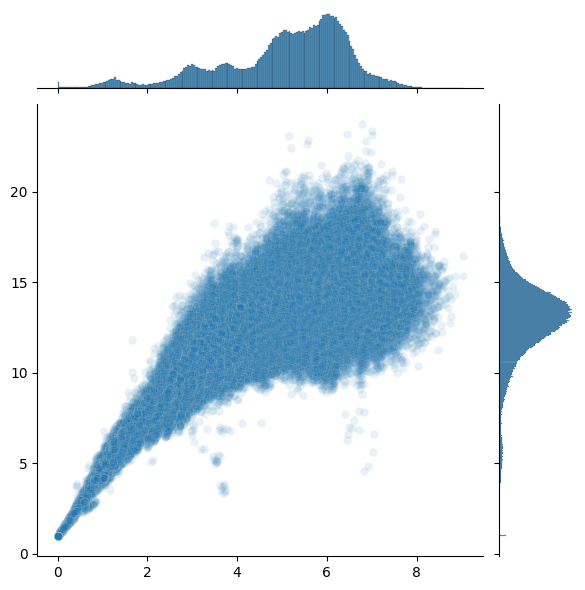

sequences , mode 0 exp


<Figure size 1000x1000 with 0 Axes>

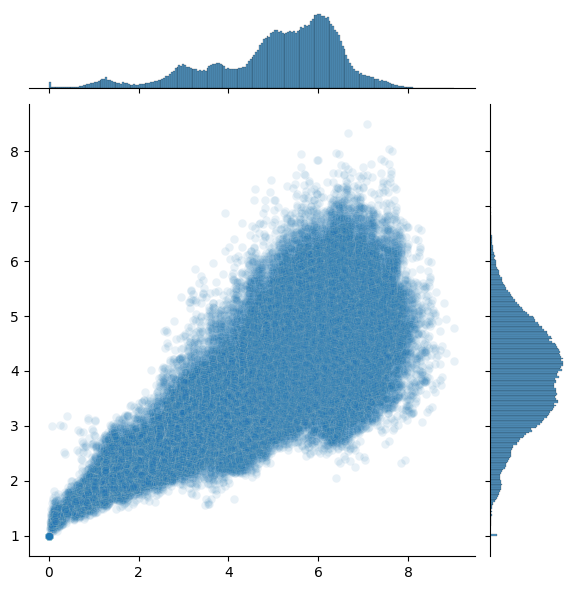

aln identity , mode 2


<Figure size 1000x1000 with 0 Axes>

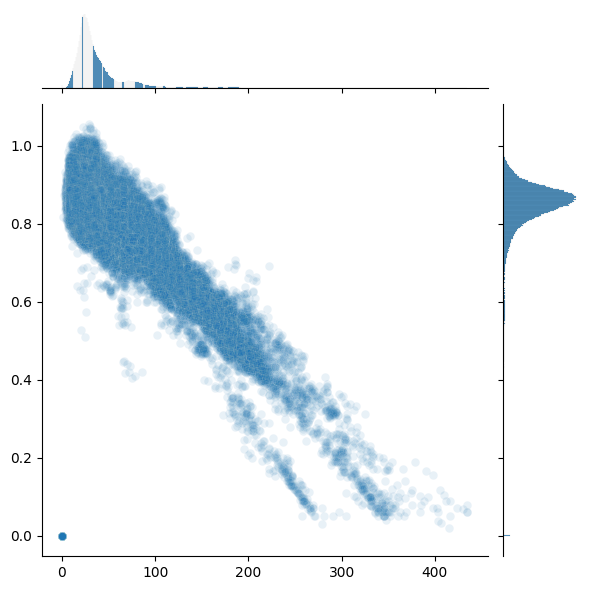

aln identity , min


<Figure size 1000x1000 with 0 Axes>

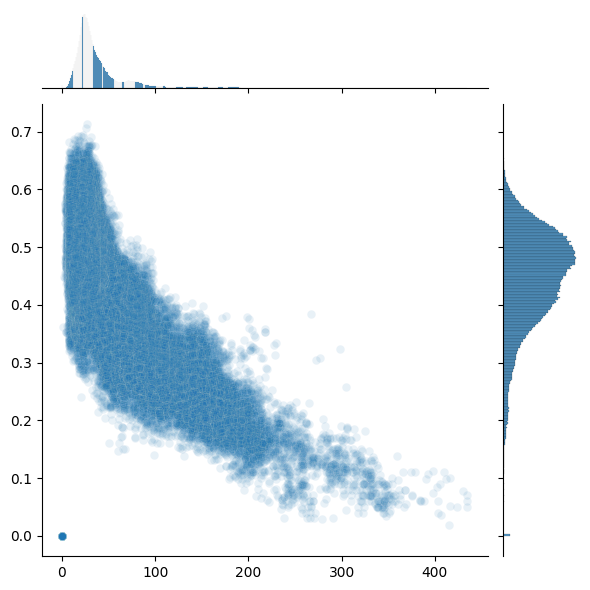

aln identity , mode 2 exp


<Figure size 1000x1000 with 0 Axes>

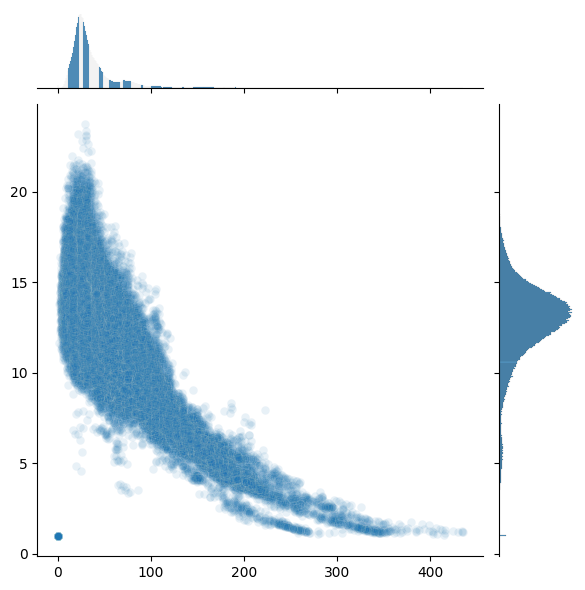

aln identity , mode 0 exp


<Figure size 1000x1000 with 0 Axes>

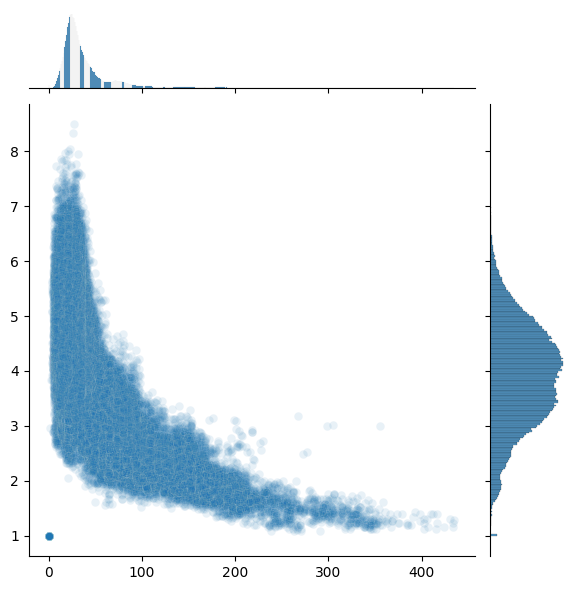

mode 2 , min


<Figure size 1000x1000 with 0 Axes>

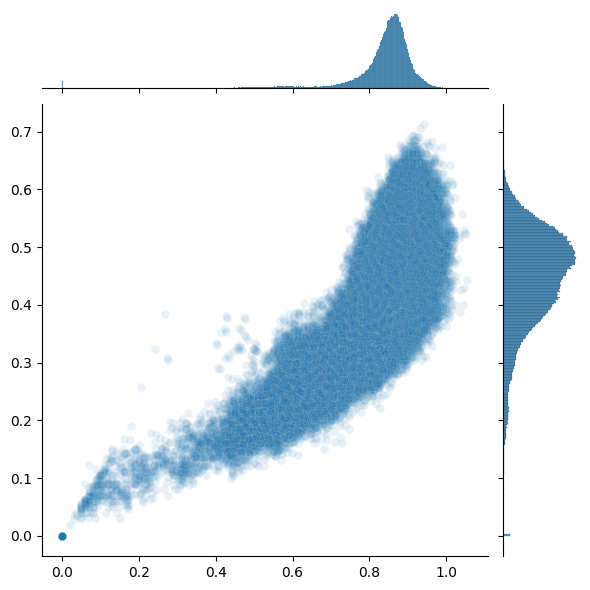

mode 2 , mode 2 exp


<Figure size 1000x1000 with 0 Axes>

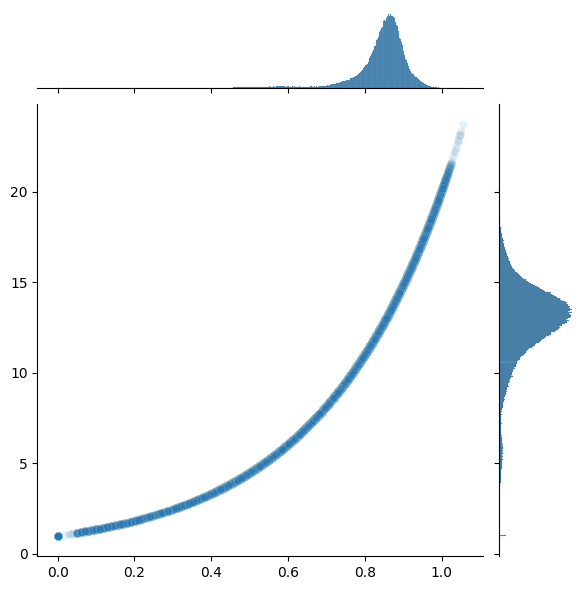

mode 2 , mode 0 exp


<Figure size 1000x1000 with 0 Axes>

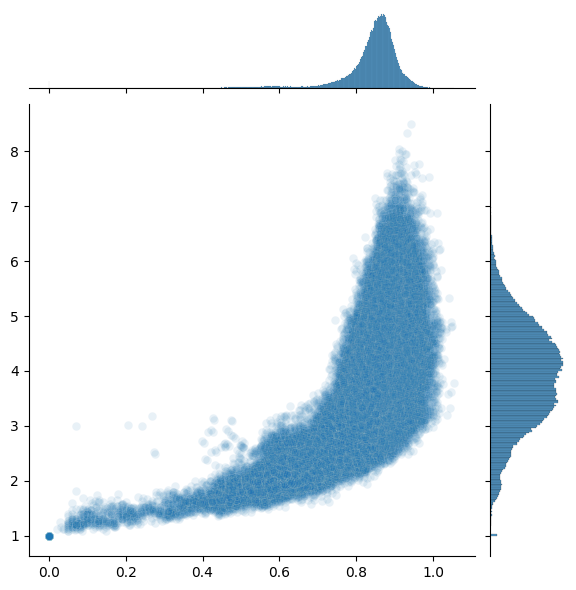

min , mode 2 exp


<Figure size 1000x1000 with 0 Axes>

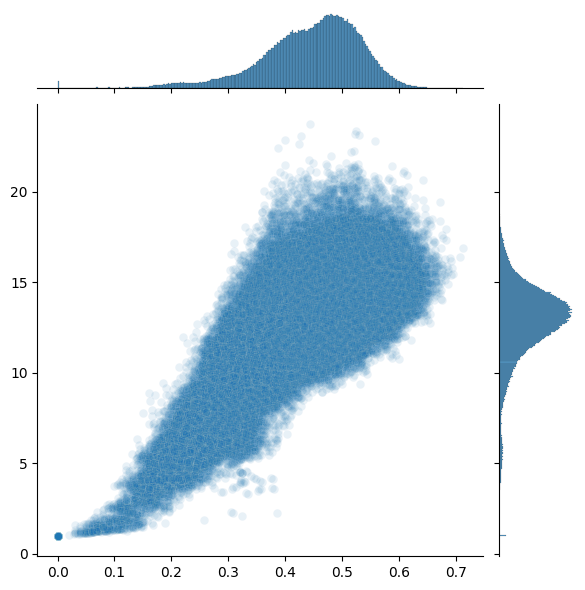

min , mode 0 exp


<Figure size 1000x1000 with 0 Axes>

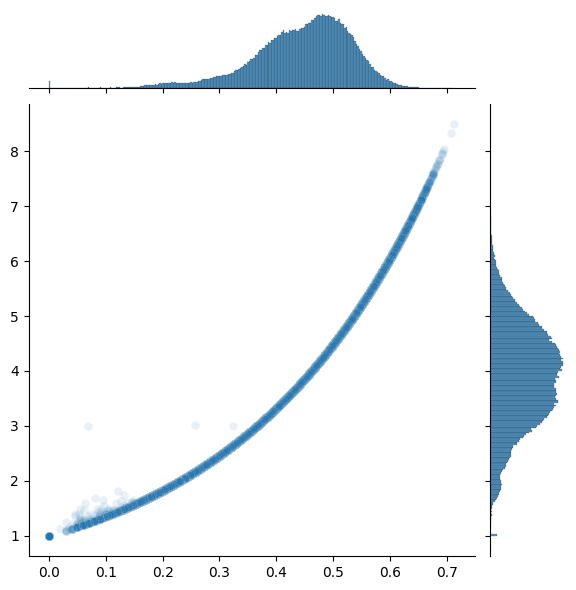

mode 2 exp , mode 0 exp


<Figure size 1000x1000 with 0 Axes>

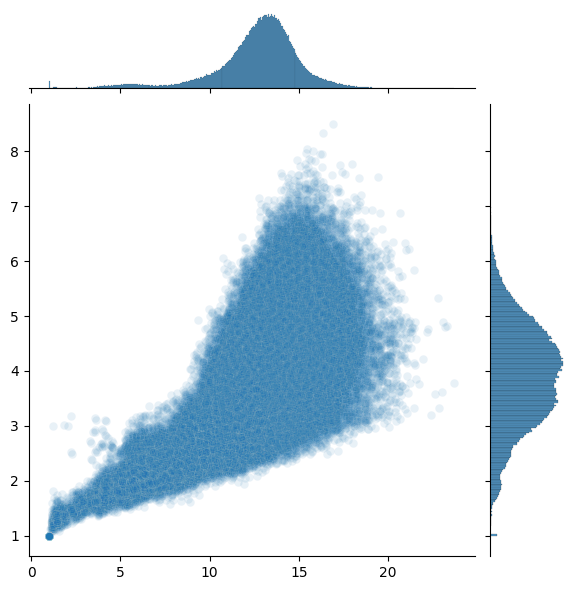

In [24]:
#grab identifiers
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#plot the flattened distance matrices relative to each other with seaborn
for mat1,mat2 in itertools.combinations(distdict,2):
    print(mat1, ',' ,mat2)
    plt.figure(figsize=(10,10))

    #
    sns.jointplot(x = distdict[mat1].flatten() , y = distdict[mat2].flatten() , alpha=0.05 )
    
    plt.savefig('./examples/RRNPP/round2/all/' + mat1 + '-' + mat2 + '.svg', bbox_inches='tight')
    plt.show()
   

    

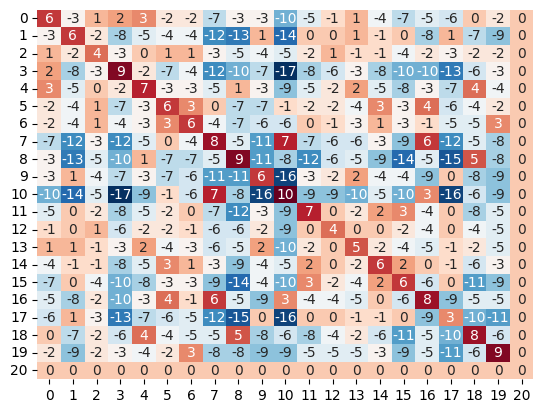

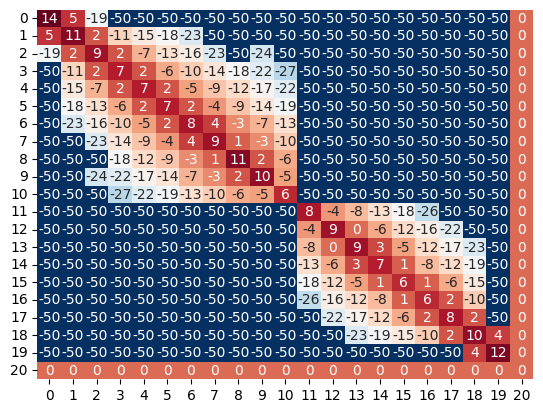

In [15]:
# 3Di bit/2
# Background (precomputed optional): 0.0489372 0.0306991 0.101049 0.0329671 0.0276149 0.0416262 0.0452521 0.030876 0.0297251 0.0607036 0.0150238 0.0215826 0.0783843 0.0512926 0.0264886 0.0610702 0.0201311 0.215998 0.0310265 0.0295417 0.00001
# Lambda     (precomputed optional): 0.351568
import seaborn as sns
import matplotlib.pyplot as plt

charindex = { i:char.strip() for char in   'A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   X'.split()}

threedimat = '''
A   6  -3   1   2   3  -2  -2  -7  -3  -3 -10  -5  -1   1  -4  -7  -5  -6   0  -2   0
C  -3   6  -2  -8  -5  -4  -4 -12 -13   1 -14   0   0   1  -1   0  -8   1  -7  -9   0
D   1  -2   4  -3   0   1   1  -3  -5  -4  -5  -2   1  -1  -1  -4  -2  -3  -2  -2   0
E   2  -8  -3   9  -2  -7  -4 -12 -10  -7 -17  -8  -6  -3  -8 -10 -10 -13  -6  -3   0
F   3  -5   0  -2   7  -3  -3  -5   1  -3  -9  -5  -2   2  -5  -8  -3  -7   4  -4   0
G  -2  -4   1  -7  -3   6   3   0  -7  -7  -1  -2  -2  -4   3  -3   4  -6  -4  -2   0
H  -2  -4   1  -4  -3   3   6  -4  -7  -6  -6   0  -1  -3   1  -3  -1  -5  -5   3   0
I  -7 -12  -3 -12  -5   0  -4   8  -5 -11   7  -7  -6  -6  -3  -9   6 -12  -5  -8   0
K  -3 -13  -5 -10   1  -7  -7  -5   9 -11  -8 -12  -6  -5  -9 -14  -5 -15   5  -8   0
L  -3   1  -4  -7  -3  -7  -6 -11 -11   6 -16  -3  -2   2  -4  -4  -9   0  -8  -9   0
M -10 -14  -5 -17  -9  -1  -6   7  -8 -16  10  -9  -9 -10  -5 -10   3 -16  -6  -9   0
N  -5   0  -2  -8  -5  -2   0  -7 -12  -3  -9   7   0  -2   2   3  -4   0  -8  -5   0
P  -1   0   1  -6  -2  -2  -1  -6  -6  -2  -9   0   4   0   0  -2  -4   0  -4  -5   0
Q   1   1  -1  -3   2  -4  -3  -6  -5   2 -10  -2   0   5  -2  -4  -5  -1  -2  -5   0
R  -4  -1  -1  -8  -5   3   1  -3  -9  -4  -5   2   0  -2   6   2   0  -1  -6  -3   0
S  -7   0  -4 -10  -8  -3  -3  -9 -14  -4 -10   3  -2  -4   2   6  -6   0 -11  -9   0
T  -5  -8  -2 -10  -3   4  -1   6  -5  -9   3  -4  -4  -5   0  -6   8  -9  -5  -5   0
V  -6   1  -3 -13  -7  -6  -5 -12 -15   0 -16   0   0  -1  -1   0  -9   3 -10 -11   0
W   0  -7  -2  -6   4  -4  -5  -5   5  -8  -6  -8  -4  -2  -6 -11  -5 -10   8  -6   0
Y  -2  -9  -2  -3  -4  -2   3  -8  -8  -9  -9  -5  -5  -5  -3  -9  -5 -11  -6   9   0
X   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
'''
threediAAmat = '''
A  14   5 -19 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
B   5  11   2 -11 -15 -18 -23 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
C -19   2   9   2  -7 -13 -16 -23 -50 -24 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
D -50 -11   2   7   2  -6 -10 -14 -18 -22 -27 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
E -50 -15  -7   2   7   2  -5  -9 -12 -17 -22 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
F -50 -18 -13  -6   2   7   2  -4  -9 -14 -19 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
G -50 -23 -16 -10  -5   2   8   4  -3  -7 -13 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
H -50 -50 -23 -14  -9  -4   4   9   1  -3 -10 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
I -50 -50 -50 -18 -12  -9  -3   1  11   2  -6 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
J -50 -50 -24 -22 -17 -14  -7  -3   2  10  -5 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
K -50 -50 -50 -27 -22 -19 -13 -10  -6  -5   6 -50 -50 -50 -50 -50 -50 -50 -50 -50   0
L -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50   8  -4  -8 -13 -18 -26 -50 -50 -50   0
M -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50  -4   9   0  -6 -12 -16 -22 -50 -50   0
N -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50  -8   0   9   3  -5 -12 -17 -23 -50   0
O -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -13  -6   3   7   1  -8 -12 -19 -50   0
P -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -18 -12  -5   1   6   1  -6 -15 -50   0
Q -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -26 -16 -12  -8   1   6   2 -10 -50   0
R -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -22 -17 -12  -6   2   8   2 -50   0
S -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -23 -19 -15 -10   2  10   4   0
T -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50 -50   4  12   0
X   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
'''

submat_3di = np.zeros((21,21), dtype=np.int8)
submat_3diAA = np.zeros((21,21), dtype=np.int8)

for i,l in enumerate(threedimat.split('\n')):
    for j,c in enumerate(l.split()):
        if i > 0 and j > 0:
            submat_3di[i-1,j-1] = int(c)


for i,l in enumerate(threediAAmat.split('\n')):
    for j,c in enumerate(l.split()):
        if i > 0 and j > 0:
            submat_3diAA[i-1,j-1] = int(c)
sns.heatmap(submat_3di, annot=True, fmt='d', cmap='RdBu_r', cbar=False)
plt.show()
sns.heatmap(submat_3diAA, annot=True, fmt='d', cmap='RdBu_r', cbar=False)
plt.show()


In [ ]:
import scipy.stats as stats
stats.pearsonr(m2.flatten(), m1.flatten())


PearsonRResult(statistic=0.840037037369748, pvalue=0.0)